## <center>MIS 665 Business Analytics / Data Mining - Final Project - Data Breach Analytics</center>

<center>Bhaskar Aryal</center>

**K-State Honor Code**

> "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."



**Your Name:** 

> Bhaskar Aryal

### Modules 
This cell of the notebook has all the modules used throughout the document. 

In [187]:
# import packages 
import pingouin as pg
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats
import plotly.express as px

from IPython.display import Image

import warnings
warnings.filterwarnings("ignore") 

### Section 1 -- Business Intelligence 

#### Part I -- Data Import and Data Quality Assessment  

(a) Download and load data

In [46]:
# Import the dataset "databreachcases-cleaned.csv" using pandas 
# Inspect the dataset 
df = pd.read_csv('databreachcases-cleaned.csv')
df.head(3)

,date,company,state,breach,org,records
0,3/3/2006,PayDayOKLLC,NJ,HACK,BSF,88.0
1,1/4/2012,SFFireCreditUnionPacifica-CoastsideCreditUnion,CA,PORT,BSF,0.0
2,2/18/2012,BDOUSARubio'sRestaurants,CA,PORT,BSR,0.0


(b) Perform data quality assessment and show the results (e.g., data types, missing values, summary statistics).

##### (i) Data types

In [3]:
# Show information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084 entries, 0 to 7083
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7084 non-null   object 
 1   company  7082 non-null   object 
 2   state    7084 non-null   object 
 3   breach   7084 non-null   object 
 4   org      7084 non-null   object 
 5   records  7084 non-null   float64
dtypes: float64(1), object(5)
memory usage: 332.2+ KB


In [4]:
# Alternatively, we can also use: 
df.dtypes

date        object
company     object
state       object
breach      object
org         object
records    float64
dtype: object

- Date, Company, State, Breach, and Org are represented as object (strings)
- Records is a numerical value of float64 type 

##### (ii) Missing values 

In [5]:
# missing values 
df.isnull().sum()

date       0
company    2
state      0
breach     0
org        0
records    0
dtype: int64

- It apperas that there are two missing values in the column "company"

##### (iii) Summary Statistics

In [6]:
#describe the data (basic statistics)
df.describe()

,records
count,7.084000e+03
mean,8.648893e+05
std,1.996389e+07
min,0.000000e+00
25%,0.000000e+00
50%,8.080000e+02
75%,5.232500e+03
max,1.370000e+09


##### (iv) Other data understanding efforts

In [7]:
for col in df.columns:
    print(col, df[col].nunique())

date 3065
company 6856
state 65
breach 8
org 7
records 2327


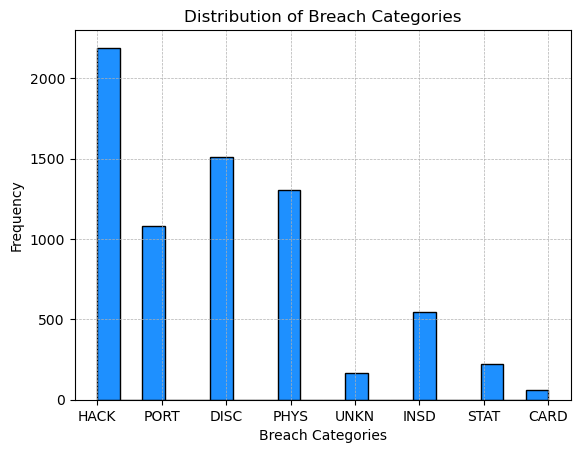

The number of unique value with respect to breach 8
These unique values are respectively:  ['HACK' 'PORT' 'DISC' 'PHYS' 'UNKN' 'INSD' 'STAT' 'CARD']


breach
CARD      63
DISC    1513
HACK    2191
INSD     546
PHYS    1306
PORT    1079
STAT     221
UNKN     165
dtype: int64

In [120]:
# Histogram to see the distribution of breach
plt.hist(df["breach"], color="dodgerblue", edgecolor="black", bins=20, rwidth=1.75)
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.xlabel("Breach Categories")  
plt.ylabel("Frequency") 
plt.title("Distribution of Breach Categories")  
plt.show()


# look at the unique values in the variable 
print("The number of unique value with respect to breach", df['breach'].nunique())
print("These unique values are respectively: ", df['breach'].unique())

#group by 
df.groupby("breach").size()

- The distribution indicates that hacing by an outside party or infected by malware is the most common breach with 2191 instances
- Fraud involving debit and credit cards have the least frequency  

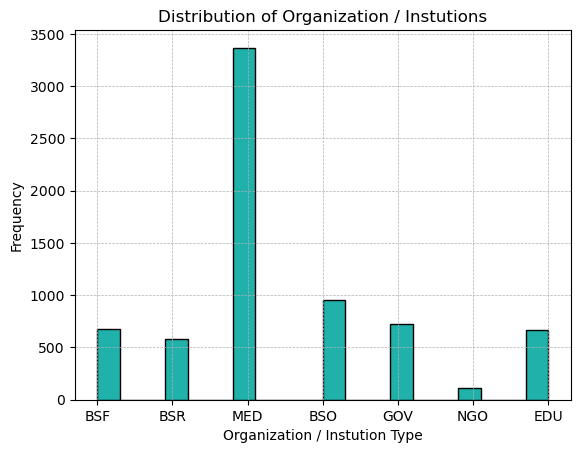

The number of unique value with respect to Instutions 7
These unique values are respectively:  ['BSF' 'BSR' 'MED' 'BSO' 'GOV' 'NGO' 'EDU']


org
BSF     675
BSO     955
BSR     581
EDU     668
GOV     722
MED    3368
NGO     115
dtype: int64

In [9]:
# Histogram to see the distribution of breach
plt.hist(df['org'], color="lightseagreen", edgecolor="black", bins=20, rwidth=1.75)
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.xlabel("Organization / Instution Type")  
plt.ylabel("Frequency") 
plt.title("Distribution of Organization / Instutions")  
plt.show()


# look at the unique values in the variable 
print("The number of unique value with respect to Instutions", df['org'].nunique())
print("These unique values are respectively: ", df['org'].unique())

#group by 
df.groupby("org").size()

- Medical instutions face the highest number of data breaches
- NGOs face the least number of data breaches

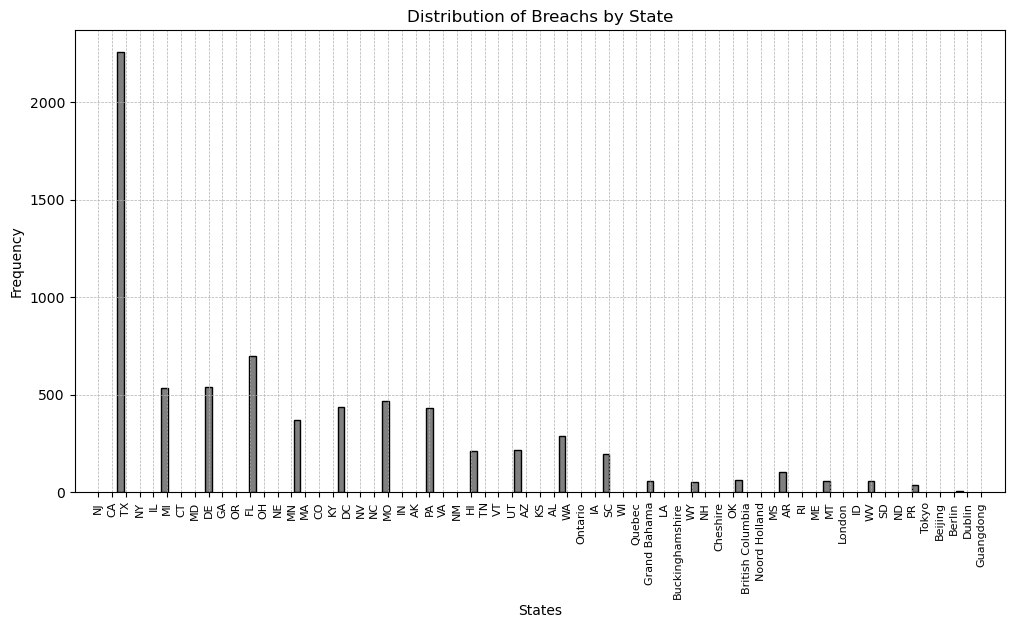

The number of unique value with respect to state 65
These unique values are respectively:  ['NJ' 'CA' 'TX' 'NY' 'IL' 'MI' 'CT' 'MD' 'DE' 'GA' 'OR' 'FL' 'OH' 'NE'
 'MN' 'MA' 'CO' 'KY' 'DC' 'NV' 'NC' 'MO' 'IN' 'AK' 'PA' 'VA' 'NM' 'HI'
 'TN' 'VT' 'UT' 'AZ' 'KS' 'AL' 'WA' 'Ontario' 'IA' 'SC' 'WI' 'Quebec'
 'Grand Bahama' 'LA' 'Buckinghamshire' 'WY' 'NH' 'Cheshire' 'OK'
 'British Columbia' 'Noord Holland' 'MS' 'AR' 'RI' 'ME' 'MT' 'London' 'ID'
 'WV' 'SD' 'ND' 'PR' 'Tokyo' 'Beijing' 'Berlin' 'Dublin' 'Guangdong']


state
AK          24
AL          63
AR          41
AZ         129
Beijing      1
          ... 
VT          31
WA         172
WI          89
WV          27
WY          11
Length: 65, dtype: int64

In [10]:
# Histogram to see the distribution of states
plt.figure(figsize=(12, 6))
plt.hist(df["state"], color="grey", edgecolor="black", bins=20, rwidth=0.15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.xlabel("States")  
plt.ylabel("Frequency") 
plt.title("Distribution of Breachs by State")  
plt.xticks(rotation=90, size = 8) 
plt.show()
# look at the unique values in the variable 
print("The number of unique value with respect to state", df['state'].nunique())
print("These unique values are respectively: ", df['state'].unique())

#group by 
df.groupby("state").size()

- The are some inconsistent values in the the states column.

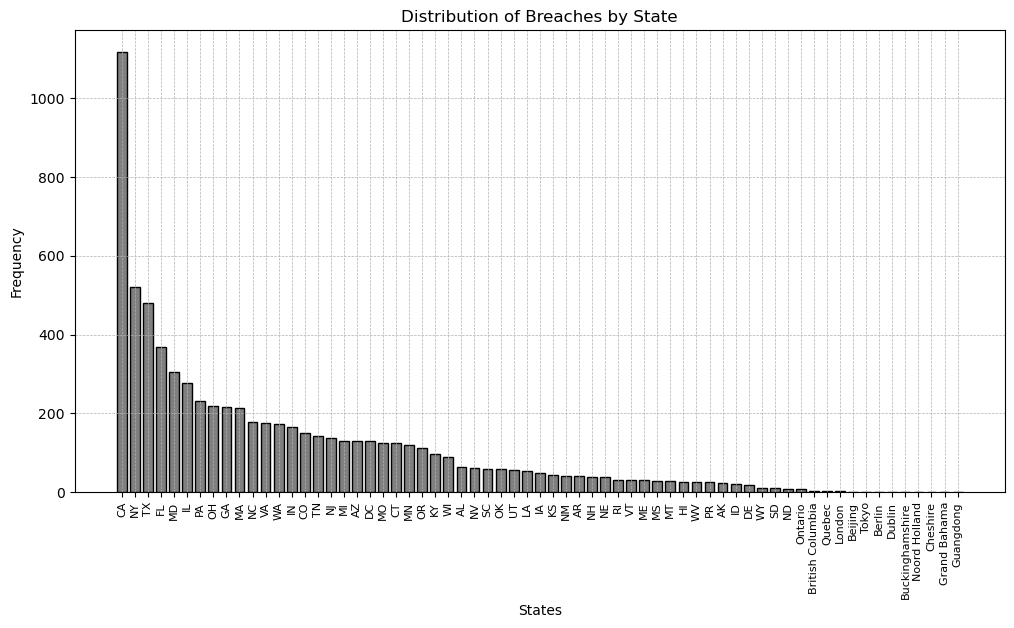

In [19]:
# Alternative better visualization 
# Increase the figure size 
plt.figure(figsize=(12, 6))
plt.bar(df['state'].value_counts().index, df['state'].value_counts().values, color='grey', edgecolor='black', width = 0.75)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel("States")
plt.ylabel("Frequency")
plt.title("Distribution of Breaches by State")
plt.xticks(rotation=90, fontsize=8) 
plt.show()


- CA has the largest number of breaches followed by NY and TX

#### Part II--Data Cleaning and Transformation 

##### (a) No space is needed in the column names. Remove space in the column names

In [54]:
# Remove spaces from the column names 
df.columns = df.columns.str.replace(' ', '')
df.columns

,date,company,state,breach,org,records
0,3/3/2006,PayDayOKLLC,NJ,HACK,BSF,88.0
1,1/4/2012,SFFireCreditUnionPacifica-CoastsideCreditUnion,CA,PORT,BSF,0.0
2,2/18/2012,BDOUSARubio'sRestaurants,CA,PORT,BSR,0.0
3,2/22/2012,DHIMortgageCompanyLtd.,TX,HACK,BSF,0.0
4,3/12/2012,ImpairmentResourcesLLC,CA,PORT,MED,14000.0


##### (b) Use lowercase for the column names.

In [38]:
# Change the names to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['date', 'company', 'state', 'breach', 'org', 'records'], dtype='object')

##### (c) Check data types 

In [15]:
# Show information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084 entries, 0 to 7083
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7084 non-null   object 
 1   company  7082 non-null   object 
 2   state    7084 non-null   object 
 3   breach   7084 non-null   object 
 4   org      7084 non-null   object 
 5   records  7084 non-null   float64
dtypes: float64(1), object(5)
memory usage: 332.2+ KB


##### (d) Modifying date column with Time Series Visualizations 

In [29]:
#(i) The date column needs to be datetime64
# create a new data frame for time series analysis 
ts = df
ts['date'] = pd.to_datetime(ts['date'])   # convert object to datetime

#verify if the date is now a datetime64 format  
ts.dtypes

date       datetime64[ns]
company            object
state              object
breach             object
org                object
records           float64
dtype: object

In [30]:
#(ii) Set the “date” column as the index column. This is required for time-series analysis.
ts = ts.set_index('date')

In [31]:
# check if the date column is now index 
ts.head(2)

,company,state,breach,org,records
date,,,,,
2006-03-03,PayDayOKLLC,NJ,HACK,BSF,88.0
2012-01-04,SFFireCreditUnionPacifica-CoastsideCreditUnion,CA,PORT,BSF,0.0


In [32]:
# see the index ... data is organized by these dates ... this is a time series data
ts.index

DatetimeIndex(['2006-03-03', '2012-01-04', '2012-02-18', '2012-02-22',
               '2012-03-12', '2012-03-14', '2012-03-19', '2012-03-19',
               '2012-03-23', '2012-03-31',
               ...
               '2009-12-15', '2009-12-11', '2009-11-23', '2009-11-20',
               '2009-11-20', '2009-11-20', '2009-11-20', '2009-11-20',
               '2009-11-17', '2009-10-28'],
              dtype='datetime64[ns]', name='date', length=7084, freq=None)

In [33]:
#(iii) Sort the data by the index
ts = ts.sort_index()
ts.index

DatetimeIndex(['2005-01-10', '2005-01-18', '2005-01-22', '2005-02-12',
               '2005-02-18', '2005-02-25', '2005-02-25', '2005-03-08',
               '2005-03-10', '2005-03-11',
               ...
               '2019-07-19', '2019-07-23', '2019-08-05', '2019-08-06',
               '2019-08-15', '2019-08-19', '2019-08-26', '2019-09-18',
               '2019-10-03', '2019-10-25'],
              dtype='datetime64[ns]', name='date', length=7084, freq=None)

##### (e) Check the number of rows and columns

In [36]:
n_rows, n_columns = ts.shape
print('Number of rows:', n_rows)
print('Number of columns:', n_columns)

Number of rows: 7084
Number of columns: 5


##### (f) If any other data cleaning and transformation are deemed necessary, feel free to do that (remember,this is an open-ended project). However, explain what you’re doing (and why you’re doing it) so that the instructor(s) can evaluate your project.

We inspected missing values in the data cleaning section. However, we have no handeled the missing values yet. There are many ways to handle missing value which include but are not limited to: 
- Dropping the observation with missin values
- Replacing the missing value with mean, medain or mode
- Performing a suitable interpolation to replace the missing value

In our case, we will move ahead by dropping the rows with missing values, so that no bias is introduced in the data

In [45]:
# check the missng values in the ts dataframe
ts.isnull().sum()

company    0
state      0
breach     0
org        0
records    0
dtype: int64

In [44]:
# Drop missing values 
ts = ts.dropna()
n_rows, n_columns = ts.shape
print('Number of rows:', n_rows)
print('Number of columns:', n_columns)

Number of rows: 7082
Number of columns: 5


- The new dataframe show two number of rows less than the original data frame  

##### We will now handle inconsistent values in the data frame 

In the "states" column, there are 65 unique values. Upon inspection, we observe that there are some cities and states outside of the US. We will remove these inconsistent values by filtering the data for US states only. 

In [48]:
# make a list of US states 
us_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC']

In [53]:
# Filter data by US states 
ts_filtered = ts[ts['state'].isin(us_states)]
ts_filtered.shape

(7031, 5)

- We removed 51 observations that were not related to US states 

In [55]:
# lets inspect the filtered dataframe 
ts_filtered.head()

,company,state,breach,org,records
date,,,,,
2005-01-10,GeorgeMasonUniversity,VA,HACK,EDU,32000.0
2005-01-18,UniversityofCaliforniaSanDiego,CA,HACK,EDU,3500.0
2005-01-22,UniversityofNorthernColorado,CO,PORT,EDU,15790.0
2005-02-12,ScienceApplicationsInternationalCorp.(SAIC),CA,STAT,BSO,45000.0
2005-02-18,UniversityofChicagoHospital,IL,INSD,MED,85.0


#### Part III--Business Intelligence 

#### Questions
(a) You must answer the questions below using data analytics techniques (e.g., pivot table, data 
visualization, descriptive statistics). Each question needs to be copied and pasted into your Jupyter 
notebook. You must use exactly the same numbering (otherwise, your grade will be lowered). Showing 
a chart or graph is not enough. Based on the chart or graph, you must provide a statement (e.g., 
“Hacking is the most popular data breach type”)

##### 1. Lets start with some basic questions

##### (a) What is the sum of total records breached, according to the data?

In [62]:
print('The sum of total records breached is:', ts_filtered['records'].sum())

The sum of total records breached is: 6075744246.0


(b) According to the data, what is the average number of total records breached?

In [63]:
print('The average number of total records breached is:', round(ts_filtered['records'].mean(), 1))

The average number of total records breached is: 864136.6


(c) What are the ten most damaging cases of data breaches in terms of the number of total records 
breached? Name the ten organizations. 

In [71]:
# sort the data by records in ascending order
top_ten_breaches = ts_filtered.sort_values(by = 'records', ascending = False).head(10)

# select the top ten orgs
print("The ten organizations with the most damaging data breaches are:")
print(top_ten_breaches['company'].tolist())

The ten organizations with the most damaging data breaches are:
['RiverCityMedia', 'Yahoo', 'FriendFinder', 'Exactis', 'MarriottInternational', 'Epsilon', 'DeepRootAnalytics', 'LinkedIn.com', 'UnderArmour', 'EquifaxCorporation']


##### 2. What types of data breaches are more common than others? Which data breach type is most common?

##### a. In terms of the number of incidents (Hint: each row in the dataset represents one incident case)

In [74]:
# lets find out the frequency of each breach type 
data_breach_frequency = ts_filtered['breach'].value_counts()
print("Frequency of each type of data breach:")
print(data_breach_frequency)

Frequency of each type of data breach:
breach
HACK    2166
DISC    1504
PHYS    1290
PORT    1079
INSD     546
STAT     219
UNKN     164
CARD      63
Name: count, dtype: int64


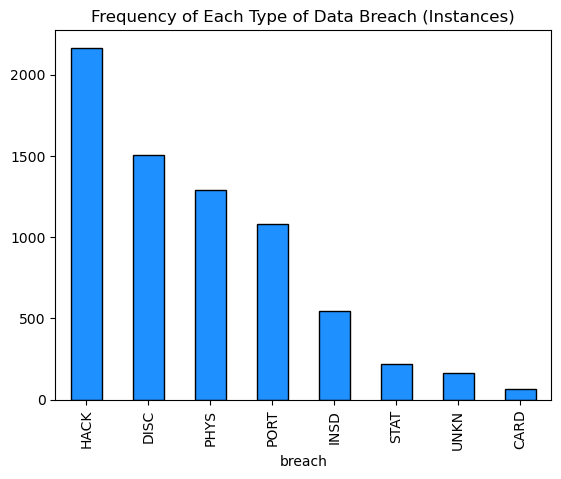

In [135]:
# Lets do some visualizatoin 
data_breach_frequency.plot(kind='bar', edgecolor = 'black', facecolor = 'dodgerblue')
plt.title('Frequency of Each Type of Data Breach (Instances)')
plt.show()

In [103]:
# Identify the most common data breach type
most_common_breach = data_breach_frequency.idxmax()
most_common_breach_count = data_breach_frequency.max()
# print
print(f"The most common type of data breach in terms of number of incidents is '{most_common_breach}' with {most_common_breach_count} occurrences.")

The most common type of data breach in terms of number of incidents is 'HACK' with 2166 occurrences.


##### (b) In terms of the number of total records (Hint: each incident causes a different degree of harm to organizations in terms of “Total Records”)

In [125]:
# breach by total records 
data_breach_total = ts_filtered.groupby('breach')['records'].sum().sort_values(ascending = False)
data_breach_total

breach
HACK    3.327818e+09
DISC    2.405588e+09
PORT    1.762578e+08
INSD    8.257934e+07
UNKN    3.193553e+07
PHYS    2.904632e+07
STAT    1.531656e+07
CARD    7.202086e+06
Name: records, dtype: float64

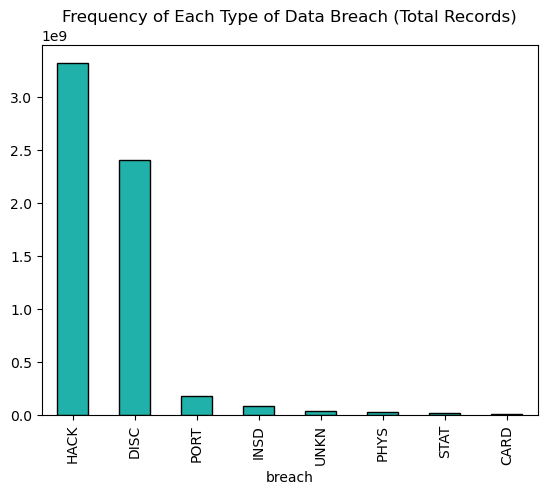

In [134]:
# Lets do some visualizatoin 
data_breach_total.plot(kind='bar', edgecolor = 'black', facecolor = 'lightseagreen')
plt.title('Frequency of Each Type of Data Breach (Total Records)')
plt.show()

In [127]:
# Identify the most common data breach type
most_common_breach = data_breach_total.idxmax()
most_common_breach_count = data_breach_total.max()
# print
print(f"The most common type of data breach in terms of number of incidents is '{most_common_breach}' with {most_common_breach_count} total records.")

The most common type of data breach in terms of number of incidents is 'HACK' with 3327818183.0 total records.


##### 3. What types of organizations are more likely to have a data breach? Which organization type has the highest number of data breaches?

##### (a) In terms of number of incidents

In [128]:
# breach by organization type - most likely using group by 
data_breach_org = ts_filtered.groupby('org')['records'].size().sort_values(ascending = False)
data_breach_org

org
MED    3339
BSO     939
GOV     722
BSF     670
EDU     668
BSR     578
NGO     115
Name: records, dtype: int64

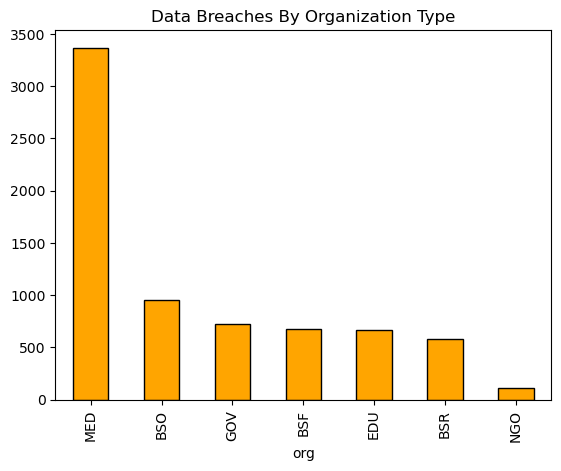

In [133]:
# Lets do some visualizatoin 
data_breach_org.plot(kind='bar', edgecolor = 'black', facecolor = 'orange')
plt.title('Data Breaches By Organization Type - Instances') 
plt.show()

In [130]:
#organization type with the highest number of data breaches
most_breaches_org = data_breach_org.idxmax()
most_breaches_org_count = data_breach_org.max()

print(f"The organization type with the most data breaches is '{most_breaches_org}' with {most_breaches_org_count} incidents.")

The organization type with the most data breaches is 'MED' with 3368 incidents.


##### (b) In terms of the number of total records

In [136]:
# breach by organization type - most likely using group by 
data_breach_org_total = ts_filtered.groupby('org')['records'].sum().sort_values(ascending = False)
data_breach_org_total

org
BSO    3.901796e+09
BSR    1.134229e+09
BSF    6.261128e+08
GOV    2.250789e+08
MED    1.179527e+08
EDU    6.213972e+07
NGO    8.434746e+06
Name: records, dtype: float64

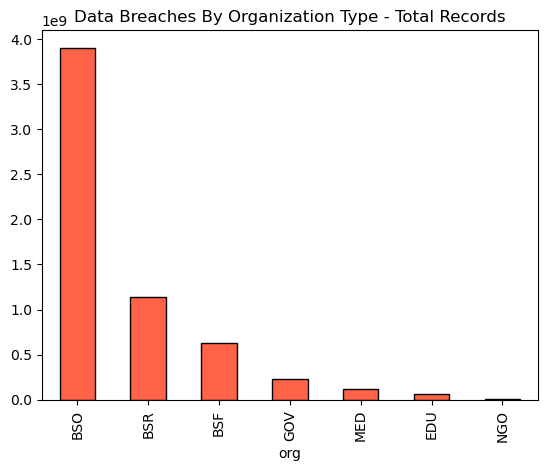

In [137]:
# Lets do some visualizatoin 
data_breach_org_total.plot(kind='bar', edgecolor = 'black', facecolor = 'tomato')
plt.title('Data Breaches By Organization Type - Total Records') 
plt.show()

In [139]:
#organization type with the highest number of data breaches
most_breaches_org = data_breach_org_total.idxmax()
most_breaches_org_count = data_breach_org_total.max()

print(f"The organization type with the most data breaches is '{most_breaches_org}' with {most_breaches_org_count} total records.")

The organization type with the most data breaches is 'BSO' with 3901796387.0 total records.


##### (c) Which organization types appear to be the target of data breaches?

In [141]:
# Based on instances 
print("Based on number of instances, the following organizations appear to be the top three targets of data breaches:", data_breach_org.head(3))

Based on number of instances, the following organizations appear to be the top three targets of data breaches: org
MED    3368
BSO     955
GOV     722
dtype: int64


In [142]:
# Based on total records
print("Based on number of instances, the following organizations appear to be the top three targets of data breaches:", data_breach_org_total.head(3))

Based on number of instances, the following organizations appear to be the top three targets of data breaches: org
BSO    3.901796e+09
BSR    1.134229e+09
BSF    6.261128e+08
Name: records, dtype: float64


##### 4. States & data breaches

##### (a) Which US states are more likely to have data breaches? 

In [190]:
# Breach and states 
data_breach_state = ts_filtered.groupby('state')['records'].size().sort_values(ascending = False)
data_breach_state

state
CA    1116
NY     521
TX     480
FL     368
MD     306
IL     277
PA     232
OH     220
GA     216
MA     214
NC     178
VA     175
WA     172
IN     166
CO     151
TN     142
NJ     138
MI     131
AZ     129
DC     128
MO     125
CT     124
MN     119
OR     113
KY      97
WI      89
AL      63
NV      61
SC      59
OK      58
UT      56
LA      55
IA      50
KS      44
NM      41
AR      41
NH      39
NE      38
RI      32
VT      31
ME      30
MS      29
MT      28
HI      27
WV      27
AK      24
ID      22
DE      18
SD      11
WY      11
ND       9
Name: records, dtype: int64

In [191]:
print("The top five states most likely to have data breaches are:", data_breach_state.head(5))

The top five states most likely to have data breaches are: state
CA    1116
NY     521
TX     480
FL     368
MD     306
Name: records, dtype: int64


In [192]:
# Visualizaton 
# change the output to dataframe 
data_breach_df = data_breach_state.reset_index(name='count')
data_breach_df.columns = ['State', 'Number of Breaches']
data_breach_df.head(2) 

,State,Number of Breaches
0,CA,1116
1,NY,521


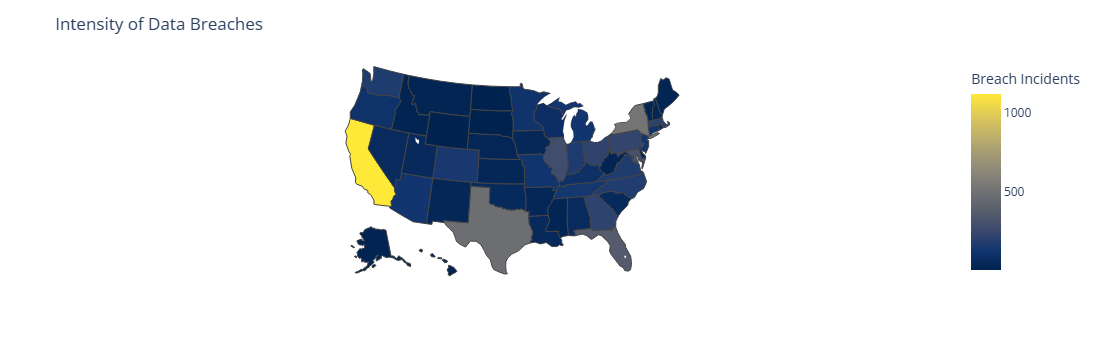

In [195]:
# Visualization for 2018 using plotly
fig = px.choropleth(
    data_breach_df, 
    locations='State', 
    locationmode='USA-states', 
    color='Number of Breaches', 
    hover_name='State', 
    hover_data={'Number of Breaches': True, 'State': False},
    color_continuous_scale=px.colors.sequential.Cividis,  
    scope="usa",  
    labels={'Number of Breaches':'Breach Incidents'})

fig.update_layout(
    title_text = 'Intensity of Data Breaches', geo_scope='usa')

# Show the plot
fig.show()

##### (b) What are the top three states regarding the number of data breaches in 2018?

In [196]:
# filter the data for year 2018 
data_2018 = ts_filtered[ts_filtered.index.year == 2018]

In [197]:
# use groupby state 
data_breach_state = data_2018.groupby('state').size().sort_values(ascending=False)
data_breach_state

state
CA    78
TX    26
MA    21
FL    18
PA    16
NY    14
MD    13
NC    12
VA    12
IL    12
IN    12
OH    10
OR    10
NJ     9
WA     9
TN     8
MO     8
AZ     8
GA     8
KY     6
CT     6
MI     6
NV     5
NM     5
CO     4
KS     4
ME     4
WI     4
ID     3
MS     3
MN     3
RI     2
UT     2
WV     2
AK     2
MT     2
AL     2
IA     2
DC     2
AR     2
WY     2
NH     1
NE     1
SC     1
HI     1
DE     1
dtype: int64

In [198]:
print("The top three states regardng the number of data breaches in 2018 are:", data_breach_state.head(3))

The top three states regardng the number of data breaches in 2018 are: state
CA    78
TX    26
MA    21
dtype: int64


In [199]:
# visualization 
data_breach_df = data_breach_state.reset_index(name='count')
data_breach_df.columns = ['State', 'Number of Breaches']
data_breach_df.head(2) 

,State,Number of Breaches
0,CA,78
1,TX,26


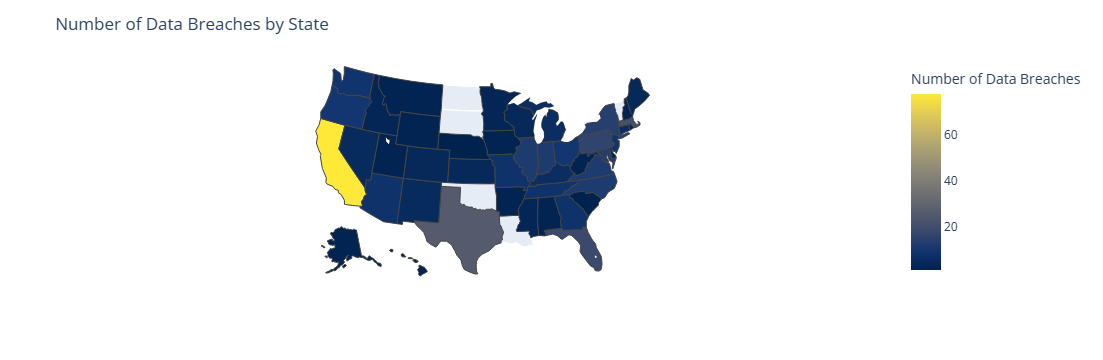

In [200]:
# Visualization for 2018 using plotly
fig = px.choropleth(
    data_breach_df, 
    locations='State', 
    locationmode='USA-states', 
    color='Number of Breaches', 
    hover_name='State', 
    hover_data={'Number of Breaches': True, 'State': False},
    color_continuous_scale=px.colors.sequential.Cividis,  
    scope="usa",  
    labels={'Number of Breaches':'Number of Data Breaches'})

fig.update_layout(
    title_text = 'Number of Data Breaches by State',
    geo_scope='usa')

# Show the plot
fig.show()

##### Relationships between organizations, state, and data breaches 

##### 5. Organizations & Data breaches

##### a. Which organization type is more vulnerable to “Hackers”?

In [206]:
# filter the data by Breach type (= Hack) and group it by org type 
vulnerability = ts_filtered[ts_filtered['breach']=='HACK'].groupby('org').size().sort_values(ascending = False)
vulnerability

org
MED    747
BSO    556
BSR    280
EDU    223
BSF    185
GOV    139
NGO     36
dtype: int64

In [207]:
print("The most vulnerable organization type to Hacking is:", vulnerability.idxmax())

The most vulnerable organization type to Hacking is: MED


##### b. What is the most popular type of data breach in education?

In [208]:
# filter the data for org type (=EDU) and groupby
EDU_breach = ts_filtered[ts_filtered['org']=='EDU'].groupby('breach').size().sort_values(ascending = False)
EDU_breach

breach
HACK    223
DISC    189
PORT    107
PHYS     56
UNKN     37
STAT     31
INSD     24
CARD      1
dtype: int64

In [209]:
print("The most popular type of data breach in Education is:", EDU_breach.idxmax())

The most popular type of data breach in Education is: HACK


##### c. What is the most popular data breach type for medical organizations?

In [210]:
# filter the data for org type (=EDU) and groupby
MED_breach = ts_filtered[ts_filtered['org']=='MED'].groupby('breach').size().sort_values(ascending = False)
MED_breach

breach
PHYS    976
DISC    815
HACK    747
PORT    439
INSD    227
STAT    100
UNKN     34
CARD      1
dtype: int64

In [211]:
print("The most popular type of data breach in Education is:", MED_breach.idxmax())

The most popular type of data breach in Education is: PHYS


##### 6. US states & data breaches

##### a. Which state is more vulnerable to “Hackers”?

In [212]:
# filter the data and goupy by states 
State_hackers = ts_filtered[ts_filtered['breach']=='HACK'].groupby('state').size().sort_values(ascending = False)
State_hackers

state
CA    412
NY    153
TX    139
MD    119
FL     96
IL     80
PA     69
GA     65
MA     64
VA     62
WA     59
OH     51
NJ     51
DC     50
MO     44
IN     43
MI     40
NC     40
CT     39
CO     39
AZ     34
MN     34
OR     31
TN     28
WI     27
NV     22
KY     22
UT     20
IA     20
NH     19
NE     16
AL     15
ME     15
VT     14
OK     13
AR     12
LA     11
SC     11
AK     10
KS     10
ID      9
DE      9
HI      8
NM      8
MT      8
MS      6
RI      5
WV      5
SD      4
ND      3
WY      2
dtype: int64

In [214]:
print("The state most vulnerable to hackers is:", State_hackers.idxmax())

The state most vulnerable to hackers is: CA


##### b. Which state is more vulnerable to “CARD”?

In [215]:
# filter the data and goupy by states 
State_card = ts_filtered[ts_filtered['breach']=='CARD'].groupby('state').size().sort_values(ascending = False)
State_card

state
CA    12
NY     8
FL     6
IL     3
MN     3
OH     3
AZ     3
TX     3
MI     2
GA     2
MA     2
WA     2
PA     2
UT     2
AR     1
VA     1
TN     1
NJ     1
OK     1
NV     1
NC     1
MO     1
ME     1
WI     1
dtype: int64

In [217]:
print("The state most vulnerable to CARD frauds is:", State_card.idxmax())

The state most vulnerable to CARD frauds is: CA


##### Organizations, data breaches & time

##### 7. Visualize data breaches over time (time series analysis – line chart). 

##### a. Visualize a time series first.

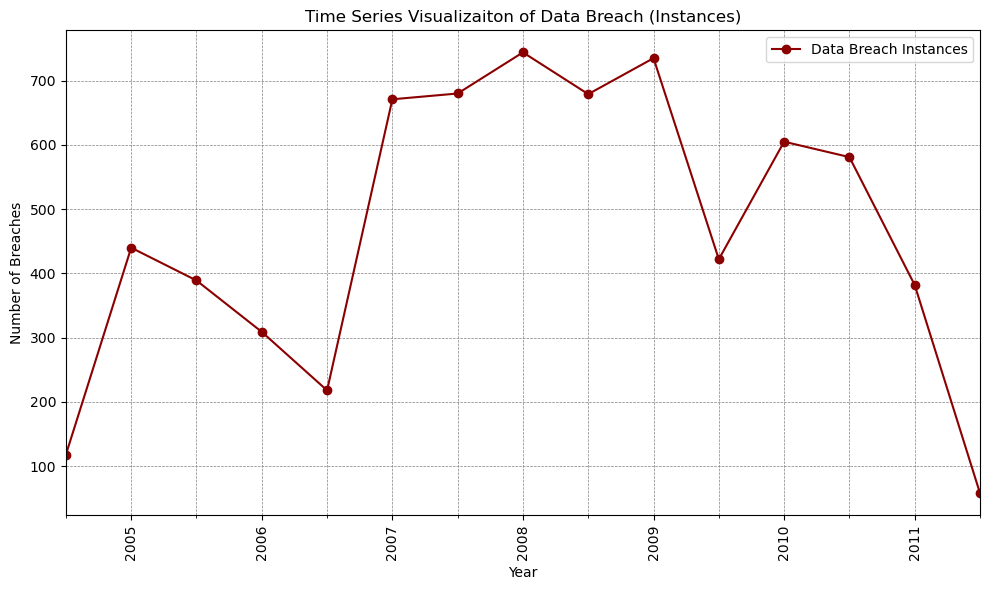

In [283]:
# Lets see how a bar chart looks 
# figsize
plt.figure(figsize=(10, 6))

# Resample the data yearly
yearly_breach_counts = ts_filtered.resample('Y').size()
yearly_breach_sum = ts_filtered.resample('Y').sum()

yearly_breach_counts.plot(kind='line', color='darkred', label='Data Breach Instances', marker = "o")

# Set the title and labels
plt.title('Time Series Visualizaiton of Data Breach (Instances)') 
plt.xlabel('Year')
plt.ylabel('Number of Breaches')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# use this to show year only in x axis 
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: str(yearly_breach_counts.index.year[pos])))
# Show grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Add legend 
plt.legend()
plt.tight_layout()  
plt.show()

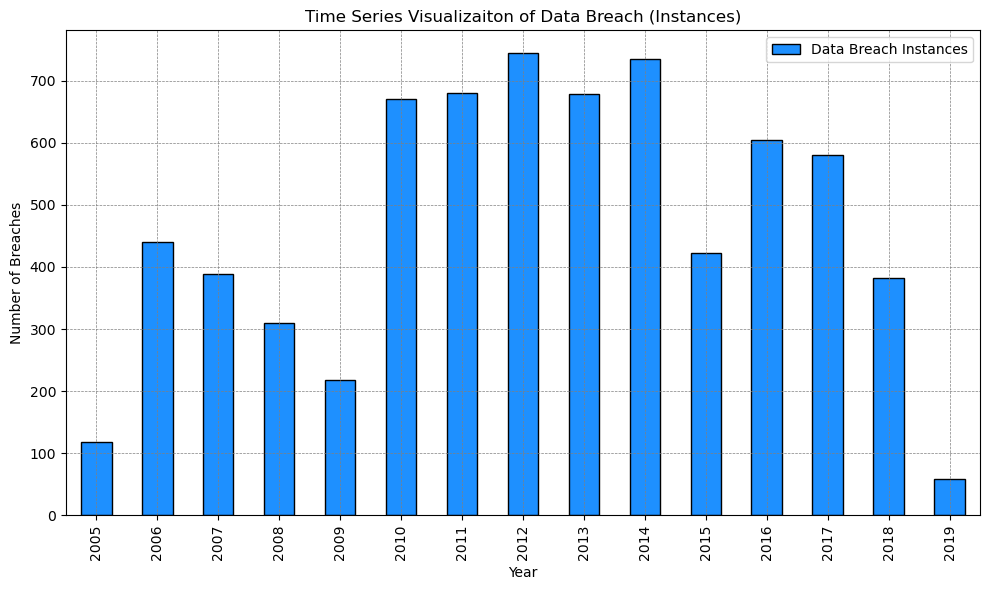

In [282]:
# Lets see how a bar chart looks 
# figsize
plt.figure(figsize=(10, 6))

# Resample the data yearly
yearly_breach_counts = ts_filtered.resample('Y').size()
yearly_breach_sum = ts_filtered.resample('Y').sum()

yearly_breach_counts.plot(kind='bar', color='dodgerblue', edgecolor='black', label='Data Breach Instances')

# Set the title and labels
plt.title('Time Series Visualizaiton of Data Breach (Instances)') 
plt.xlabel('Year')
plt.ylabel('Number of Breaches')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# use this to show year only in x axis 
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: str(yearly_breach_counts.index.year[pos])))
# Show grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Add legend 
plt.legend()
plt.tight_layout()  
plt.show()

<Figure size 1000x600 with 0 Axes>

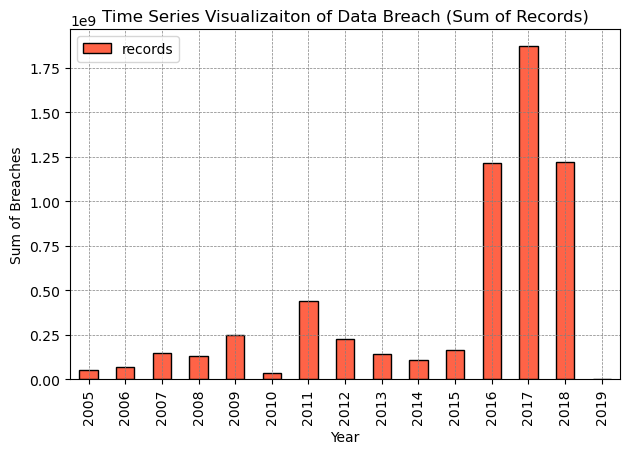

In [271]:
# Visualization of sum of records over years
plt.figure(figsize=(10, 6))

# Resample the data yearly
yearly_breach_sum = ts_filtered.resample('Y').sum()

yearly_breach_sum.plot(kind='bar', color='tomato', edgecolor='black', label='Data Breach Instances')

# Set the title and labels
plt.title('Time Series Visualizaiton of Data Breach (Sum of Records)') 
plt.xlabel('Year')
plt.ylabel('Sum of Breaches')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# use this to show year only in x axis 
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: str(yearly_breach_counts.index.year[pos])))
# Show grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Add legend 
plt.legend()
plt.tight_layout()  
plt.show()

##### b. How many breaches per year?

In [286]:
# Resample and count 
yearly_breach_counts = ts_filtered.resample('Y').count()
yearly_breach_counts['breach'].to_frame()

,breach
date,
2005-12-31,118
2006-12-31,440
2007-12-31,389
2008-12-31,309
2009-12-31,218
2010-12-31,671
2011-12-31,680
2012-12-31,744
2013-12-31,679


##### 8. Any relationship between time and data breach type? 

##### a. Has any data breach type increased over time?

In [303]:
# Resample by year and count breaches by type
yearly_breach_counts_type = ts_filtered.groupby('breach').resample('Y').size().unstack(fill_value=0)
#Transpose
yearly_breach_counts_type = yearly_breach_counts_type.T

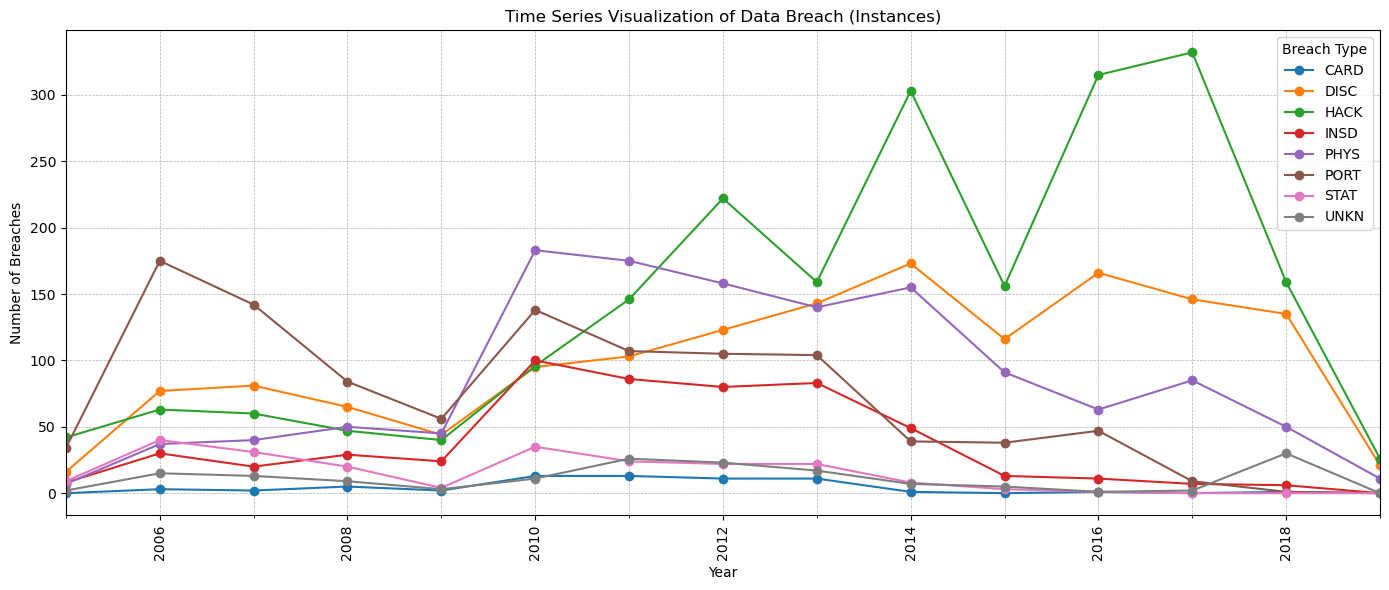

In [333]:
fig, ax = plt.subplots(figsize=(14, 6)) 
# Plotting 
yearly_breach_counts_type.plot(kind='line', marker='o', ax=ax)

# Set titles and labels
ax.set_title('Time Series Visualization of Data Breach (Instances)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Breaches')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(title='Breach Type')
plt.tight_layout()
plt.show()

- *HACK* and *DISC* type of data breach have increased over time
- *PHYS*, *PORT*, *INSD* shows decrease over time notably after 2010

##### Multiple data breaches (repeating incidents)

##### 9. Organizations that have experienced repeated incidents

##### a. How many organizations (“company”) have multiple data breaches (more than one data breach since 2005)? 

In [326]:
# filter data to select after 2005 
data_2005_after = ts_filtered[ts_filtered.index.year > 2005]

In [327]:
# Count the occurrences of each company
company_counts = df['company'].value_counts()

In [328]:
# Multiple breaches
multiple_breaches = company_counts[company_counts > 1]
print("Number of companies with with multiple breaches:", multiple_breaches.count())

Number of companies with with multiple breaches: 185


##### (b) This question extends the previous question a. What organizational or institutional types are closely associated with those organizations having multiple data breaches (more than one data breach between 2005 and 2019)?

In [330]:
# since no data after 2019 we will use the earlier filtered data
company_org_counts = data_2005_after.groupby(['company', 'org']).size()

# Find companies with multiple breaches
multiple_breaches = company_org_counts[company_org_counts.groupby(level=0).transform('count') > 1] # level = 0 is for company grouping i.e first index

org_counts = multiple_breaches.reset_index().groupby('org').size()

# Print the result
print("Org types closely associated with organizations having multiple data breaches since 2005:")
print(org_counts.sort_values(ascending = False))

Org types closely associated with organizations having multiple data breaches since 2005:
org
MED    54
BSO    25
BSR    24
BSF    23
EDU     4
NGO     2
GOV     1
dtype: int64


- MED, BSO and BSR are the top three org types that have companies hit by multiple data breach cases

##### Kansas & your questions (Drill-down on one data breach type, one organization type, or one time period)

##### 10. Kansas & your questions (be creative to draw an insightful story from the data!)

##### a. What are Kansas's top five data breach cases regarding the number of records?

In [332]:
# fiter data by state KS 
df_KS = ts_filtered[ts_filtered['state']=="KS"]
df_KS.head()

,company,state,breach,org,records
date,,,,,
2006-01-20,UniversityofKansas(KansasUniversity),KS,DISC,EDU,9200.0
2006-07-18,U.S.DepartmentofAgriculture,KS,PORT,GOV,350.0
2006-08-01,WichitaStateUniversity,KS,HACK,EDU,2000.0
2007-01-28,SalinaRegionalHealthCenter,KS,PORT,MED,1100.0
2007-09-19,KansasUniversity,KS,PHYS,EDU,0.0


In [342]:
# top five cases of data breach in Kansas 
df_KS_breach = df_KS.sort_values(by = "records", ascending = False).head(5)
print("Kansas's top five data breach cases regarding the number of records:")
df_KS_breach

Kansas's top five data breach cases regarding the number of records:


,company,state,breach,org,records
date,,,,,
2017-07-21,KansasDepartmentofCommerce,KS,HACK,GOV,5500000.0
2017-03-27,America'sJobLinkAlliance,KS,HACK,BSO,2100000.0
2016-02-26,ValleyHopeAssociation,KS,PORT,MED,52076.0
2013-10-10,CityofWichita-ElectronicProcurementWebsite,KS,HACK,GOV,29000.0
2018-03-08,KansasDepartmentforAgingandDisabilityServices(...,KS,HACK,GOV,11000.0


##### b. What is the trend of data breaches in Kansas since 2015?

In [336]:
# filter data to select after 2005 
df_KS_2015 = ts_filtered[ts_filtered.index.year >= 2015]
df_KS_2015.head()

,company,state,breach,org,records
date,,,,,
2015-01-01,SummitFinancialGroup,CA,DISC,BSF,662.0
2015-01-01,UnitedAirlines,IL,HACK,BSO,0.0
2015-01-01,FastForwardAcademy,FL,HACK,EDU,0.0
2015-01-02,Chic-Fil-A,GA,HACK,BSO,0.0
2015-01-05,mdINRLLC,FL,DISC,MED,1859.0


In [343]:
# resample the data 
df_KS_breach_trend = df_KS_2015.resample('Y').size()

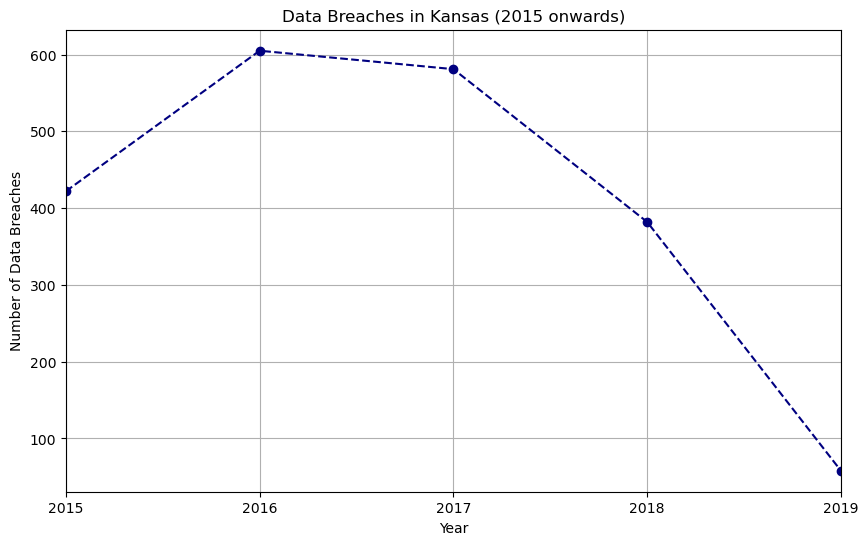

In [346]:
# Plot the trend using a line plot
plt.figure(figsize=(10, 6))
df_KS_breach_trend.plot(marker='o', linestyle='--', color = "navy")
plt.title('Data Breaches in Kansas (2015 onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Data Breaches')
plt.grid(True)
plt.show()

- There is a decilining trend of data breach in KS 2015 onwards

##### (c) What is the most popular type of data breach in KS since 2015

In [347]:
df_KS_breach_popular = df_KS_2015.groupby('breach')['records'].size().sort_values(ascending = False)
df_KS_breach_popular

breach
HACK    988
DISC    584
PHYS    300
PORT     95
UNKN     38
INSD     37
STAT      4
CARD      2
Name: records, dtype: int64

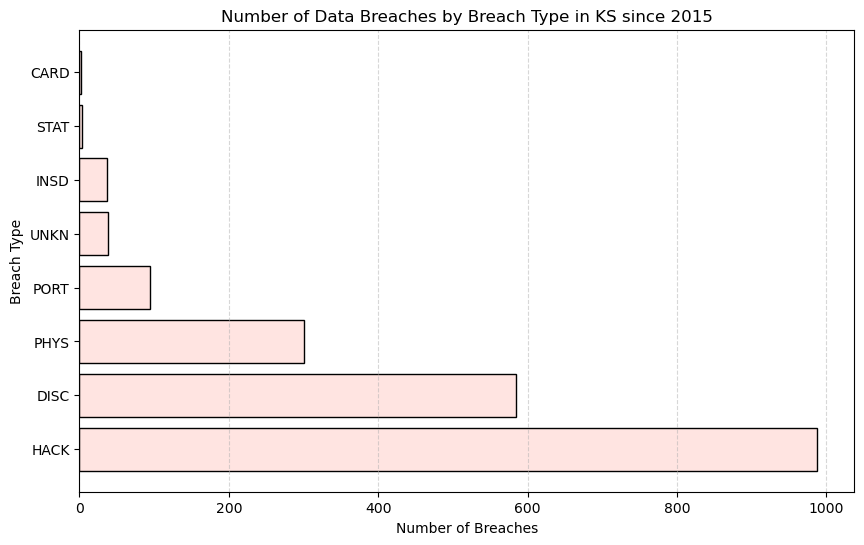

In [360]:
# Create a horizontal bar chart visualization 
plt.figure(figsize=(10, 6))
plt.barh(df_KS_breach_popular.index, df_KS_breach_popular.values, color='mistyrose', edgecolor = 'black')
plt.xlabel('Number of Breaches')
plt.ylabel('Breach Type')
plt.title('Number of Data Breaches by Breach Type in KS since 2015')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [358]:
print("The most popular type of data breach in Kansas since 2015 is:", df_KS_breach_popular.idxmax())

The most popular type of data breach in Kansas since 2015 is: HACK


#### Part IV--Story Telling 

##### 4. Provide your analysis's three most surprising/interesting findings.

- The instances of data breach are higher between 2010 and 2014, however, if we analyze by the sum of records 2016, 2017 and 2018 have higher record. The highest being for the year 2017.
- For the year 2018, North Dokota, South Dakota and Louisiana did not have any case of data breach. 
- Physical damage/loss ( Includes paper documents that are lost, discarded, or stolen) i.e. is the most popular data breach in Health Care and Medical Service sector )